## Major League Baseball Analysis Lab

#### Lab Introduction
The data set I use in this lab is from "Maximal Information-based Nonparametric Exploration" (MINE) through "exploredata.net". The data set contains statistics for every major league baseball player (excluding pitchers and pinch runners) from the 2008 MLB season. There are 132 statistics included in the dataset ranging from common stats such as salary and batting average, to more obscure stats such as "GB%" which is the percentage of batted balls that are classified as ground balls.

### Question 1: Which Statistic is Most Correlated with a Player's Salary

#### Question 1 Introduction
Perhaps the most interesting statistic in the dataset is "salary" as it can potentially provide insight into what statistic team managers, general managers, and owners value the most because the players who play well in that stat category are paid better than those who do not perform as well. To find out which statistic is most alligned with salary, I wil look for correlations between every statistic and salary because the statistic that is most correlated with salary can give insight into what is most important in a player.

C:\Anaconda3\lib\site-packages\scipy\stats\stats.py:3003: RuntimeWarning: invalid value encountered in double_scalars
  r = r_num / r_den
C:\Anaconda3\lib\site-packages\scipy\stats\stats.py:5041: RuntimeWarning: invalid value encountered in less
  x = np.where(x < 1.0, x, 1.0)  # if x > 1 then return 1.0


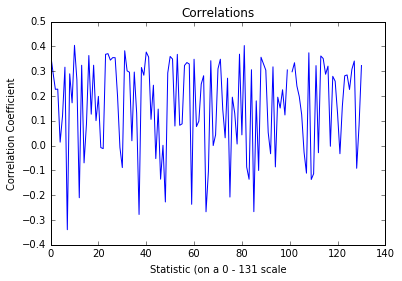

In [21]:
#Import the dataset and delete the first line
import csv
x = open("MLB2008.csv", 'r')
dataFile = list(csv.reader(x))

#Import stats
import scipy.stats as st

#List for Salary
salary = []

#Make Dictionary
statDict = {}

#Append all salaries to this list
for x in range(1,len(dataFile)):
    salary.append(float(dataFile[x][2]))
#Add all statCategory:correlation to dictionary
for x in range(3,134):    
    test = []
    for z in range(1,len(dataFile)):
        test.append(float(dataFile[z][x]))
    statDict[dataFile[0][x]] = st.pearsonr(salary,test)

#Create graph plotting all of the correlations
%matplotlib inline
import matplotlib.pyplot as plt
corrList = []
for x in statDict:
    corrList.append(statDict[x][0])
plt.plot(corrList)
plt.title("Correlations")
plt.xlabel("Statistic (on a 0 - 131 scale")
plt.ylabel("Correlation Coefficient")

In [20]:
#Find the most correlated stat
stat = 0
for majorKey in statDict:
    if statDict[majorKey][0] > stat:
        stat = statDict[majorKey][0]
        statValue = majorKey

print("Statistic:", statValue)
print("Correlation:", stat)

Statistic: BB
Correlation: 0.404257312863


#### Question 1 Process:
In order to find the statistic most correlated with salary, I first needed to create a list with all values of salary. I used a nested "for" loop wherein an empty list was created, it was appended every value for each player for one statistice. After that, the list was correlated to my list with all the salaries and that correlation (along with a p-value) was entered into a dictionary with a key of the statistic's name. This loop, which includes the defining of an empty list was repeated for every statistic. The result was a dictionary with the correlations for each statistic and salary. In addition, this method allowed me to correlate every statistic to salary using just one list because it was redefined as empty every time it goes through the loops. 
    
Next I used a "for" loop with an "if" statement within it to find the most correlated statisic. In order to find that statistic, I defined a variable "x" as 0 and then ran the loop which tests if the first correlation is greater than 0. If it is greater, x gets redefined as that correlation and then the loop will compare the next statistic to that. If the correlation is not greater than x, the loop tests the next correlation. At the end of the foor loop, x should be defined as the correlation of the most correlated statistic. Because the correlation's are compared through the dictionary, the key of the correlation is easily callable which indicates what statistic is the most correlated.
    
#### Question 1: Discussion
After conducting this analysis, the most correlated statistic to salary is "BB", or,"Bases on Balls". What that means is that the statistic measures the amount of times a player was walked both accidently or intentionally. In baseball, it is not uncommon for a pitcher to intentionally walk a player who is a good batter, especially if there are other players on the bases. In fact, some pitchers will intentionally walk a player with the bases loaded because they would rather sacrifice one run than potentially allow for a grand slam (home run with bases loaded). It can then be concluded that players who are walked often are not only good batters, but so good that they are essentially seen as guarenteed runs. Therefore, it makes sense that these players with exceptional batting skills would be paid the most and that "Bases on Ball" would be the most correlated statistic with salary.
    
It is important to note that the correlation coefficient is just 0.404. This tells us that while there definitely a correlation between "BB" and salary, it is not an especially strong correlation. This also makes sense because while being a good batter is fundamental to winning games, the whole team needs to be good at batting and defense. The medium-strength correlation indicates that while batting is important to winning games, there are more aspects to the game that are valued when it comes to a player's salary. 

### Question 2: Which position is the best at offense?

#### Question 2: Introduction
Now that it has been established that being a good batter (or percieved by the pither to be a good batter) is more correlated to salary than any other statistic, it begs the question regarding which position bats the best. In order to find out, I will create an offensive metric that combines three of the most telling statistics regarding batting and then find which posistion has the highest value for that metric.

Legend:
First Base
Catcher
Left Field
Third Base
Center Field
Designated Hitter
Second Base
Pinch Hitter
Shortstop
Right Field


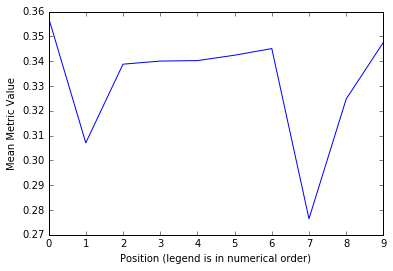

In [37]:
#Create my offensive metric
position = []
batAve = []
slugging = []
onBaseP = []
offAves = []
for x in range(1,len(dataFile)):
    position.append(float(dataFile[x][4]))
    batAve.append(float(dataFile[x][68]))
    slugging.append(float(dataFile[x][69]))
    onBaseP.append(float(dataFile[x][70]))
for x in range(0,337):
    offAves.append((onBaseP[x]+batAve[x]+slugging[x])/3)
    
#Lists for each position
catcher = []
base1 = []
base2 = []
base3 = []
shortstop = []
fieldL = []
fieldC = []
fieldR = []
desigH = []
pinchH = []

#Append offensive metric to lists according to position
for x in range(0,337):
    if position[x] == 2:
        catcher.append(offAves[x])
    if position[x] == 3:
        base1.append(offAves[x])
    if position[x] == 4:
        base2.append(offAves[x])
    if position[x] == 5:
        base3.append(offAves[x])
    if position[x] == 6:
        shortstop.append(offAves[x])
    if position[x] == 7:
        fieldL.append(offAves[x])
    if position[x] == 8:
        fieldC.append(offAves[x])
    if position[x] == 9:
        fieldR.append(offAves[x])
    if position[x] == 10:
        desigH.append(offAves[x])
    if position[x] == 11:
        pinchH.append(offAves[x])

#Caclulate Means and store each as a value in a dictionary with posistion as the keys
import statistics as st
posMean = {}
posMean["Catcher"] = st.mean(catcher)
posMean["First Base"] = st.mean(base1)
posMean["Second Base"] = st.mean(base2)
posMean["Third Base"] = st.mean(base3)
posMean["Shortstop"] = st.mean(shortstop)
posMean["Left Field"] = st.mean(fieldL)
posMean["Center Field"] = st.mean(fieldC)
posMean["Right Field"] = st.mean(fieldR)
posMean["Designated Hitter"] = st.mean(desigH)
posMean["Pinch Hitter"] = st.mean(pinchH)

#Create graph of each mean metric value
meansForGraph = []
for x in posMean:
    meansForGraph.append(posMean[x])
plt.plot(meansForGraph)
plt.xlabel("Position (legend is in numerical order)")
plt.ylabel("Mean Metric Value")
print("Legend:")
for x in posMean:
    print(x)

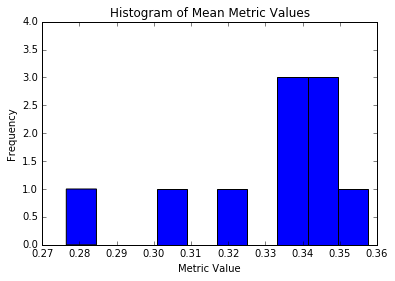

In [48]:
#Create a histogram of mean metric values
plt.hist(meansForGraph)
plt.ylim(0,4)
plt.ylabel("Frequency")
plt.xlabel("Metric Value")
plt.title("Histogram of Mean Metric Values")

In [35]:
#Find Highest Mean
mean = 0
for majorKey in posMean:
    if posMean[majorKey] > mean:
        mean = posMean[majorKey]
        whatPosition = majorKey
print("Posistion with Best Offense:", whatPosition)
print("Offensive Metric:", mean)

Posistion with Best Offense: First Base
Offensive Metric: 0.3575428571428571


#### Question 2 Process:
First, I had to create my metric. I took three, conventional statistics measuring a player's batting abilities and averaged them for each player. The statistics I chose were "On-Base Percentage" (OBP), "Slugging Percentage" (SLG), and "Batting Average" (AVG). OBP measures the rate a player gets on base compared to their total amount of batting attempts. AVG is the amount of hits divided by the amount of at-bats. SLG is the basically the same as AVG but weights each hit by the base they reached. For example, a player who hits three triples on five at-bats would have the same AVG but higher SLG compared to a player who hits three singles on five at-bats. The difference between OBP and SLG/AVG is that OBP looks at all the times a player reaches a base, regardless of a hit because OBP takes into accounts walks and the amount of times a player was hit by the ball (an automatic walk). Essentially, these three statistics all show how valuable a player is to a team in terms of batting and take many factors into consideration. It is important to note that "BB" - established to be the most correlated statistic to salary - is also a part of the metric as it is used to compute OBP.

After I created the metric, I made a list that would contain the metric value for each player in the league. While doing this, I also created another list that kept track of each players posistion. Using the list with posistions, I split up my metric value list into 10 lists - one for each posistion recorded^. I then took the mean for each list and stored each in a dictionary with their corresponding position as their key. Finally, I used a similar "for" loop with an "if" statement like the one in question one to find the highest mean. Because I used a dictionary, I was also able to find the position of that highest mean.

^ - pitchers and pinch runners - who do not usually bat - were not included in the data set.

#### Question 2 Discussion:
The data analysis returned that players who play first base have the best mean metric value which indicates that they are the best batters. After talking with a University Prep baseball player, this makes sense. "First basemen are traditionally power hitters," explained Thomas Butler, "if you look at some major league first basemen compared to second basemen or shortstops, the first basemen are a lot bigger". This adds significant context to the results of the data analysis. First basemen will almost always stay close to the first base while almost every other position moves around the infield or outfield a lot. For instance, looking at Butler's comparison between positions, second basemen are responsible for all of the space between first and second base, and similarly, shortstops are responsible for all the space between second and third base. As a result, playing first base requires significantly less atheleticism and agility than almost every other position making it resaonable for first baseman to be bigger and more powerful hitters. In addition, the statistics that make up the metric favor power hitters who have a higher tendency to hit doubles, triples, and home runs. That means that power hitters would not only have high SLGs but also high OBP's because more pitchers are likely to intentionally walk them. Therefore, it makes sense that first basemen would be the best batters.

This asks an interesting question: Why do first basemen bat better than thrid basemen, who play a very similar position, or designated hitters, who do not play defense at all? While there is no clear-cut explanation for why that may be true, it is important to add that the metric values for third basemen and designated hitters are very close to that of first basemen. This is the purpose of my second graph for question 2, the histogram. The histogram clearly shows a mean metric value between 0.35 and 0.36 with a frequency of 1 which would be the mean value for first basemen as the fits that interval. What is significant is that the histogram is unimodal at the two intervals directly preceding 3.5-3.6 with frequencies of 3. This shows that while first basemen have the highest mean metric value for my metric, other positions are not far behind so either my metric is not very indicative, or my findings are only slightly significant. 

### Bibliography

D-backs Walk Bonds with the Bases Loaded. Dir. MLB. Perf. Barry Bonds and Johnny Oates. YouTube. YouTube, 27 May 2015. Web. 30 Mar. 2016. 

"Home | MINE: Maximal Information-based Nonparametric Exploration." Home | MINE: Maximal Information-based Nonparametric Exploration. Broad Institute. Web. 31 Mar. 2016. 

"Interview of Thomas Butler." Personal interview. 30 Mar. 2016. 

SABR. "Sabermetrics." Sabr.org. Society for American Baseball Research. Web. 30 Mar. 2016. 